In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(7,5)
plt.rcParams['figure.dpi']=100

import utils

In [ ]:
salary = 60
# assume salary of that much
age_now = 40  
age_ret = 66 
# retirement age

# we assume salary increase 4% 
salary_inc = 0.04

In [23]:
ann_rate = utils.annuity_rate()
# this is the rate used ot convert DC -> DB (ie. cash into annuity)

def get_ann_value(db, dc, lump):
    """ 
    Return the value of everything as an annuity
    """
    # we take lump sum + dc and convert into annuity added to DB
    return (dc+lump)*ann_rate + db

In [24]:
# Let's check the value of the pension as a function of inflation 

inflation = np.linspace(0.01,0.1,20)
old_values = np.zeros_like(inflation)
new_values = np.zeros_like(inflation)


In [25]:
age_delta= age_ret - age_now
for i, curi in enumerate(inflation):
    old_values[i]=get_ann_value(
        *utils.future_value(salary, age_delta,
                           salary_inc=salary_inc, uss_options =utils.USS_OLD_opts, inflation=curi))
    new_values[i]=get_ann_value(*utils.future_value(salary, age_delta, 
                                     salary_inc=salary_inc, uss_options=utils.USS_NEW_opts, inflation=curi))

print (new_values)
print (old_values)


[26.33854974 24.23861205 22.4073222  20.80999458 18.60857578 16.51392739
 14.66306379 13.02668875 11.57913666 10.29790908  9.16327214  8.15790664
  7.26660368  6.47599978  5.77434622  5.15130803  4.59778875  4.10577752
  3.66821561  3.27887984]
[28.72160905 27.09016434 25.68048683 24.46272137 23.41101383 22.50296937
 21.71918535 20.64284036 19.44416473 18.34101349 17.32456584 16.38689533
 15.52087275 14.72008012 13.97873445 13.29162027 12.6540296  12.0617088
 11.51081121 10.99785511]


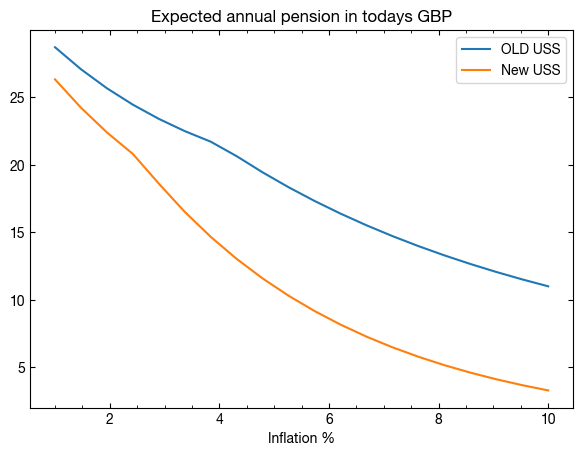

In [35]:
plt.plot(inflation*100,old_values, label='OLD USS')
plt.plot(inflation*100,new_values, label='New USS')
plt.xlabel('Inflation %')
plt.title('Expected annual pension in todays GBP')
plt.legend()